In [1]:
import sys
sys.path.append('/home/sethih1/masque_new/ters_gen')

In [2]:
import os 
import glob
import pandas as pd

In [3]:
# List all .npz files in a directory and create a pandas DataFrame with their filenames
npz_train = "/scratch/phys/sin/sethih1/data_files/final_data_used/train/"  # Change this to your directory path
npz_files = glob.glob(os.path.join(npz_train, "*.npz"))
df_train = pd.DataFrame({'filename': [os.path.basename(f) for f in npz_files]})
print(df_train.describe())

         filename
count        1164
unique       1164
top     80006.npz
freq            1


In [4]:
# List all .npz files in a directory and create a pandas DataFrame with their filenames
npz_train = "/scratch/phys/sin/sethih1/data_files/final_data_used/train/"  # Change this to your directory path
npz_files = glob.glob(os.path.join(npz_train, "*.npz"))
df_train = pd.DataFrame({'filename': [os.path.basename(f) for f in npz_files]})
print(df_train.describe())

         filename
count        1164
unique       1164
top     80006.npz
freq            1


In [5]:
npz_val = "/scratch/phys/sin/sethih1/data_files/final_data_used/val_/"  # Change this to your directory path
npz_files = glob.glob(os.path.join(npz_val, "*.npz"))
df_val = pd.DataFrame({'filename': [os.path.basename(f) for f in npz_files]})
print(df_val.describe())

       filename
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


In [6]:
npz_val = "/scratch/phys/sin/sethih1/data_files/final_data_used/test/"  # Change this to your directory path
npz_files = glob.glob(os.path.join(npz_val, "*.npz"))
df_test = pd.DataFrame({'filename': [os.path.basename(f) for f in npz_files]})
print(df_test.describe())

          filename
count          146
unique         146
top     151097.npz
freq             1


In [7]:
val = len(df_val)
train = len(df_train)
test = len(df_test)

total = val + train + test
rtr = (train/total)*100
rv = (val/total)*100
rt = (test/total)*100

print(total, rtr, rv, rt)

1310 88.85496183206106 0.0 11.145038167938932


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split


def split_data(input_dir, output_dir, val_ratio = 0.2, seed = 42):

    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val_')

    # Create directories for train and val
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Get all files in the input directory
    files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]
    
    
    train_files, val_files = train_test_split(files, test_size=val_ratio, random_state=seed)

    for f in train_files:
        shutil.copy(os.path.join(input_dir, f), os.path.join(train_dir, f))
    for f in val_files:
        shutil.copy(os.path.join(input_dir, f), os.path.join(val_dir, f))
    

    print(f"Split {len(files)} files into {len(train_files)} train and {len(val_files)} val files.")

output_dir = "/scratch/phys/sin/sethih1/data_files/final_data_used/val/"
npz_val = "/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_npz_1.0"
output_dir = "/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_npz_1.0"

split_data(npz_val, output_dir, val_ratio = 0.5, seed = 42)

Split 293 files into 146 train and 147 val files.


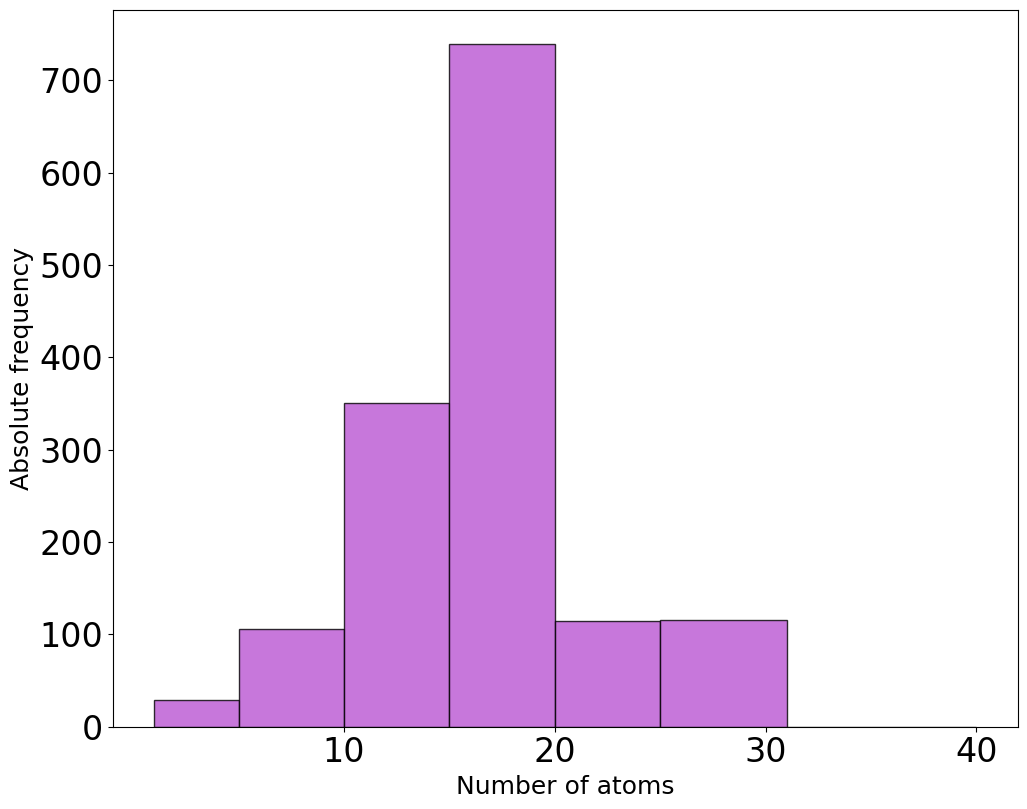

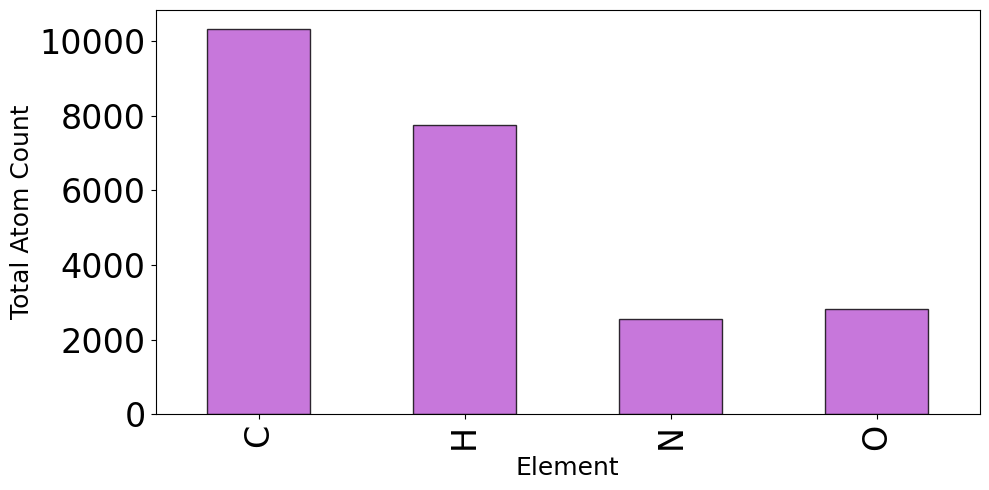

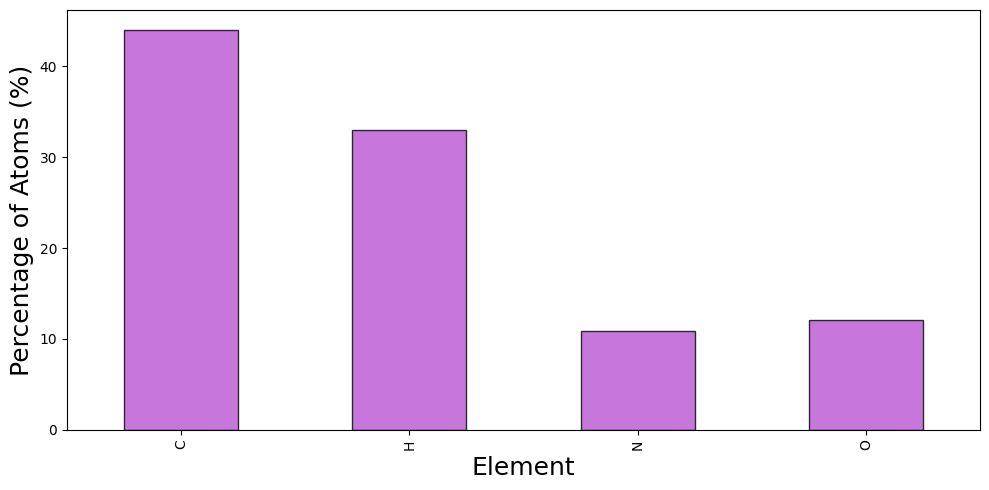

Top elements:
 C    10317
H     7746
N     2550
O     2836
Name: count, dtype: int64
Total number of molecules: 1455


In [33]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_files import read_fchk, read_npz
from matplotlib.ticker import FuncFormatter

# Atomic number to element symbol mapping
atomic_number_to_symbol = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    # Add more if needed
}



def analyze_folder(folder_path):
    records = []
    all_elements = []

    for file in glob.glob(os.path.join(folder_path, "**", "*.npz"), recursive=True):
        _, atomic_numbers = read_npz(file)
        num_atoms = len(atomic_numbers)
        elements = [atomic_number_to_symbol.get(n, f"Z{n}") for n in atomic_numbers]
        all_elements.extend(elements)

        records.append({
            "filename": os.path.basename(file),
            "num_atoms": num_atoms,
            "elements": elements
        })

    df = pd.DataFrame(records)

    # Molecule size histogram
    size_hist = df['num_atoms'].value_counts().sort_index()

    # Element histogram
    element_series = pd.Series(all_elements)
    element_hist = element_series.value_counts().sort_index()

    element_percentage = (element_hist / element_hist.sum()) * 100

    # Plot molecule size histogram
    plt.figure(figsize=(10, 8))
    #size_hist.plot(kind='bar', color='teal')
    bins_range = [1,5,10,15,20,25, 31, 35, 40] # range(1, df['num_atoms'].max() + 11, 5)
    #bins_range = range(1, df['num_atoms'].max() + 11, 5)
    plt.hist(df['num_atoms'], bins=bins_range, color='mediumorchid', alpha = 0.8, edgecolor='black')
    plt.xlabel('Number of Atoms in Molecule')
    plt.xlabel('Number of atoms', fontsize = 18)
    plt.ylabel('Absolute frequency', fontsize=18)
    #plt.ylabel('Number of Molecules')
    #plt.title('Molecule Sizes ')
    #plt.title('Dataset of molecules', fontsize=28)
    #plt.grid(True)
    plt.tight_layout()
    xticks = list(range(10, 41, 10))  # → [1, 10, 20, 30, 40]
    plt.xticks(xticks, fontsize=24)
    plt.yticks(fontsize=24)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else int(x)))
    plt.savefig('dataset_hist.png', transparent=True, bbox_inches='tight')
    plt.show()

    # Plot element histogram
    plt.figure(figsize=(10, 5))
    element_hist.plot(kind='bar', color='mediumorchid', alpha = 0.8, edgecolor='black')
    plt.xlabel('Element', fontsize = 18)
    plt.ylabel('Total Atom Count', fontsize = 18)
    #plt.title('Elements Across All Molecules', fontsize = 24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    #plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    element_percentage.plot(kind='bar', color='mediumorchid', alpha = 0.8, edgecolor='black')
    plt.xlabel('Element', fontsize=18)
    plt.ylabel('Percentage of Atoms (%)', fontsize=18)
    #plt.title('Element Composition Across All Molecules', fontsize=22)
    #plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('dataset_elements.png', transparent=True, bbox_inches='tight')
    plt.show()

    return df, size_hist, element_hist

# Example usage
#folder_path = "/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters" # Replace with actual folder
folder_path =  "/scratch/phys/sin/sethih1/data_files/old/all_group_images"
folder_path = "/scratch/phys/sin/sethih1/data_files/final_data_used"
df_molecules, size_hist, element_hist = analyze_folder(folder_path)

# Save (optional)
#df_molecules.to_csv("molecule_data.csv", index=False)
#size_hist.to_csv("molecule_size_histogram.csv")
#element_hist.to_csv("element_histogram.csv")

# Print summary
print("Top elements:\n", element_hist.head())
print("Total number of molecules:", len(df_molecules))


In [30]:
from matplotlib.ticker import FuncFormatter
def analyze_folder(folder_path):
    records = []
    all_elements = []

    for file in glob.glob(os.path.join(folder_path, "*.fchk")):
        _, atomic_numbers = read_fchk(file)
        num_atoms = len(atomic_numbers)
        elements = [atomic_number_to_symbol.get(n, f"Z{n}") for n in atomic_numbers]
        all_elements.extend(elements)

        records.append({
            "filename": os.path.basename(file),
            "num_atoms": num_atoms,
            "elements": elements
        })

    df = pd.DataFrame(records)

    # Molecule size histogram
    size_hist = df['num_atoms'].value_counts().sort_index()

    # Element histogram
    element_series = pd.Series(all_elements)
    element_hist = element_series.value_counts().sort_index()

    element_percentage = (element_hist / element_hist.sum()) * 100

    # Plot molecule size histogram
    plt.figure(figsize=(10, 8))
    #size_hist.plot(kind='bar', color='teal')
    bins_range = [1,5,10,15,20,25, 31, 35, 40] # range(1, df['num_atoms'].max() + 11, 5)
    #bins_range = range(1, df['num_atoms'].max() + 11, 5)
    plt.hist(df['num_atoms'], bins=bins_range, color='mediumorchid', alpha = 0.8, edgecolor='black')
    plt.xlabel('Number of Atoms in Molecule')
    plt.xlabel('Number of atoms', fontsize = 36)
    plt.ylabel('Absolute frequency', fontsize=36)
    #plt.ylabel('Number of Molecules')
    #plt.title('Molecule Sizes ')
    plt.title('Dataset of molecules', fontsize=28)
    #plt.grid(True)
    plt.tight_layout()
    xticks = list(range(10, 51, 10))  # → [1, 10, 20, 30, 40]
    plt.xticks(xticks, fontsize=24)
    plt.yticks(fontsize=24)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else int(x)))
    plt.savefig('dataset_hist.png', transparent=True, bbox_inches='tight')
    plt.show()


    

    # Plot element histogram
    plt.figure(figsize=(10, 5))
    element_hist.plot(kind='bar', color='mediumorchid', alpha = 0.8, edgecolor='black')
    plt.xlabel('Element')
    plt.ylabel('Total Atom Count')
    plt.title('Elements Across All Molecules')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()


    plt.figure(figsize=(10, 5))
    element_percentage.plot(kind='bar', color='blue')
    plt.xlabel('Element', fontsize=20)
    plt.ylabel('Percentage of Atoms (%)', fontsize=20)
    #plt.title('Element Composition Across All Molecules', fontsize=22)
    #plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df, size_hist, element_hist

# Example usage
#folder_path = "/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters" # Replace with actual folder
folder_path =  "/scratch/phys/sin/sethih1/data_files/first_second_third_group"
df_molecules, size_hist, element_hist = analyze_folder(folder_path)


# Print summary
print("Top elements:\n", element_hist.head())
print("Total number of molecules:", len(df_molecules))

KeyboardInterrupt: 

In [ ]:
1455

In [19]:
1164 + 291

1455

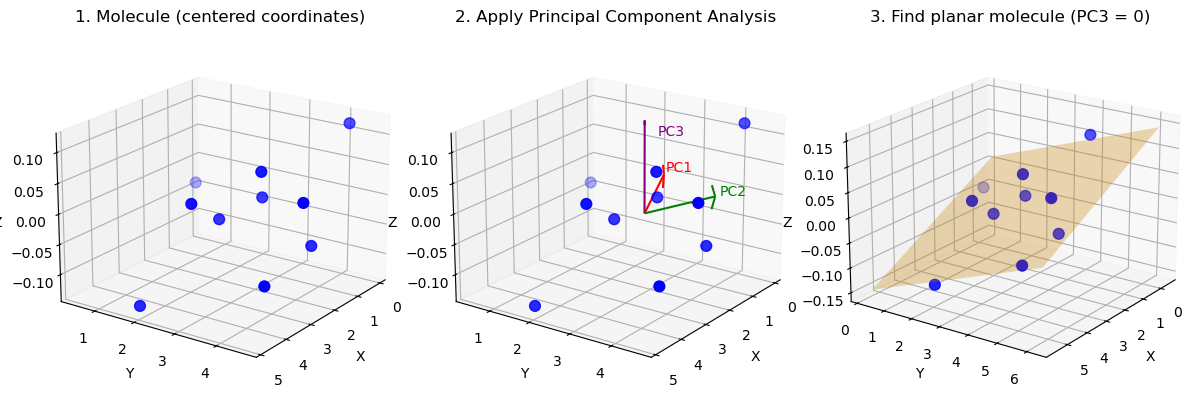

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate slightly planar molecule
np.random.seed(0)
N = 10
xy_coords = np.random.rand(N, 2) * 5
z_coords = np.random.randn(N) * 0.05
coords = np.hstack([xy_coords, z_coords[:, None]])

# Center and PCA
coords_centered = coords - coords.mean(axis=0)
cov_matrix = np.cov(coords_centered.T)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
order = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, order]

# Plane fitting via SVD
U, S, Vt = np.linalg.svd(coords_centered)
normal_vector = Vt[2]
point = coords.mean(axis=0)

# Plane grid
plane_size = 6
xx, yy = np.meshgrid(np.linspace(point[0] - plane_size/2, point[0] + plane_size/2, 10),
                     np.linspace(point[1] - plane_size/2, point[1] + plane_size/2, 10))
zz = (-normal_vector[0]*(xx - point[0]) - normal_vector[1]*(yy - point[1])) / normal_vector[2] + point[2]

# Plot
fig = plt.figure(figsize=(12, 4))

# Panel 1: Atomic Coordinates
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax1.set_title("1. Molecule (centered coordinates)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=20, azim=35)

# Panel 2: PCA
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)

arrow_length_ratio = 0.05  # Smaller arrowhead

for vec, color, label in zip(eigenvectors.T, ['red', 'green', 'purple'], ['PC1', 'PC2', 'PC3']):
    # Label offset to avoid overlap, tweak as needed
    label_pos = point + vec * 1.6
    length = 1.5
    if label == 'PC3':
        label_pos = point + vec * 0.15
        label_pos += np.array([0, 0.3, -0.02])  # Slight upward shift for PC3 label
        length = 0.15
    ax2.quiver(*point, *vec, length=length, color=color, arrow_length_ratio=arrow_length_ratio)
    ax2.text(*label_pos, label, color=color, fontsize=10)
ax2.set_title("2. Apply Principal Component Analysis")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=20, azim=35)

# Panel 3: Best-Fit Plane
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax3.plot_surface(xx, yy, zz, alpha=0.3, color='orange')
ax3.set_title("3. Find planar molecule (PC3 = 0)")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.view_init(elev=20, azim=35)

# Save and show
fig.tight_layout()
plt.savefig("pca_rmsd_planarity_presentation.svg", format='svg', dpi=300)
plt.show()


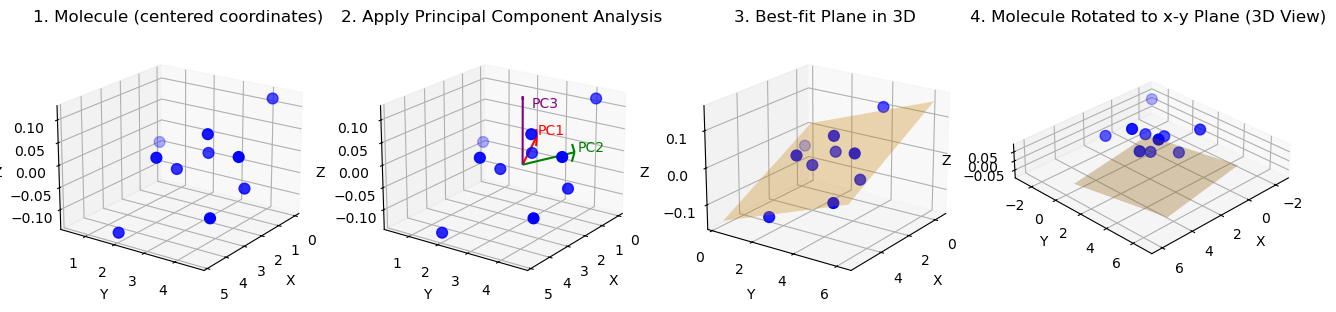

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (Your existing code here...)

def rotation_matrix_from_vectors(vec1, vec2):
    """ Find rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: Rotation matrix (3x3) which when applied to vec1 aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)  # no rotation needed
    kmat = np.array([[ 0, -v[2], v[1]],
                     [ v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])
    rotation_mat = np.eye(3) + kmat + kmat @ kmat * ((1 - c) / (s ** 2))
    return rotation_mat

# Compute rotation matrix to align normal_vector with z-axis
R = rotation_matrix_from_vectors(normal_vector, np.array([0, 0, 1]))

# Rotate coordinates and plane points
coords_rot = (R @ coords_centered.T).T
point_rot = R @ (point - point)  # point centered, so zero vector here

# Rotate plane grid points to get zz=0 (should be close to zero)
plane_points = np.vstack([xx.ravel() - point[0], yy.ravel() - point[1], zz.ravel() - point[2]])
rotated_plane_points = R @ plane_points
xx_rot = rotated_plane_points[0].reshape(xx.shape) + point[0]
yy_rot = rotated_plane_points[1].reshape(yy.shape) + point[1]
zz_rot = rotated_plane_points[2].reshape(zz.shape) + point[2]

# Plotting updated figure with rotated plane
fig = plt.figure(figsize=(16, 4))

# Panel 1: Original molecule
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax1.set_title("1. Molecule (centered coordinates)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=20, azim=35)

# Panel 2: PCA arrows
ax2 = fig.add_subplot(142, projection='3d')
ax2.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
arrow_length_ratio = 0.05
for vec, color, label in zip(eigenvectors.T, ['red', 'green', 'purple'], ['PC1', 'PC2', 'PC3']):
    label_pos = point + vec * 1.6
    length = 1.5
    if label == 'PC3':
        label_pos = point + vec * 0.15
        label_pos += np.array([0, 0.3, -0.02])
        length = 0.15
    ax2.quiver(*point, *vec, length=length, color=color, arrow_length_ratio=arrow_length_ratio)
    ax2.text(*label_pos, label, color=color, fontsize=10)
ax2.set_title("2. Apply Principal Component Analysis")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=20, azim=35)

# Panel 3: Best-fit plane original orientation
ax3 = fig.add_subplot(143, projection='3d')
ax3.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax3.plot_surface(xx, yy, zz, alpha=0.3, color='orange')
ax3.set_title("3. Best-fit Plane in 3D")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.view_init(elev=20, azim=35)

# Panel 4: Rotated molecule and plane aligned to x-y plane with 3D perspective
ax4 = fig.add_subplot(144, projection='3d')
ax4.scatter(coords_rot[:, 0], coords_rot[:, 1], coords_rot[:, 2], color='blue', s=60)
ax4.plot_surface(xx_rot, yy_rot, zz_rot, alpha=0.3, color='orange')
ax4.set_title("4. Molecule Rotated to x-y Plane (3D View)")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_zlabel("Z")

# Set view angle to highlight rotation but still see depth
ax4.view_init(elev=30, azim=45)  # try different angles if you want
ax4.set_box_aspect([1,1,0.2])  # flatten z aspect ratio slightly to emphasize planarity

# Optionally set axis limits close to data for better scale perception
lims = 3  # adjust based on your data range




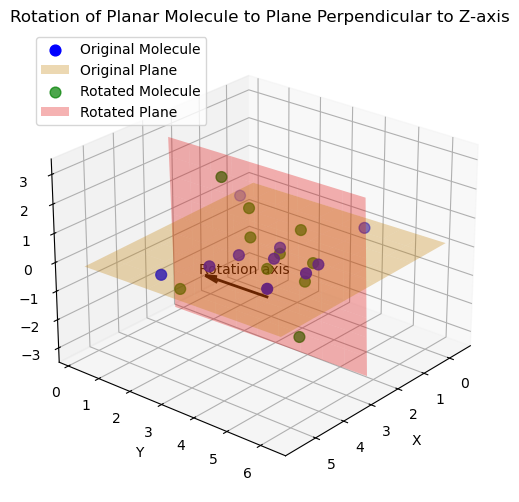

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Setup same molecule coords (you can reuse your coords)
np.random.seed(0)
N = 10
xy_coords = np.random.rand(N, 2) * 5
z_coords = np.random.randn(N) * 0.05
coords = np.hstack([xy_coords, z_coords[:, None]])
coords_centered = coords - coords.mean(axis=0)
point = coords.mean(axis=0)

# Plane fitting via SVD
U, S, Vt = np.linalg.svd(coords_centered)
normal_vector = Vt[2]

# Plane grid (original plane)
plane_size = 6
xx, yy = np.meshgrid(np.linspace(point[0]-plane_size/2, point[0]+plane_size/2, 10),
                     np.linspace(point[1]-plane_size/2, point[1]+plane_size/2, 10))
zz = (-normal_vector[0]*(xx - point[0]) - normal_vector[1]*(yy - point[1])) / normal_vector[2] + point[2]

# Rotation matrix to rotate normal_vector to x-axis (perpendicular to z-axis)
def rotation_matrix_from_vectors(vec1, vec2):
    a, b = (vec1/np.linalg.norm(vec1)).reshape(3), (vec2/np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a,b)
    c = np.dot(a,b)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)
    kmat = np.array([[0,-v[2],v[1]], [v[2],0,-v[0]], [-v[1],v[0],0]])
    return np.eye(3) + kmat + kmat@kmat*((1-c)/(s**2))

# Rotate normal vector to x-axis (perpendicular to z)
target_normal = np.array([1,0,0])
R = rotation_matrix_from_vectors(normal_vector, target_normal)

coords_rot = (R @ (coords - point).T).T + point
plane_points = np.vstack([xx.ravel()-point[0], yy.ravel()-point[1], zz.ravel()-point[2]])
rotated_plane_points = R @ plane_points
xx_rot = rotated_plane_points[0].reshape(xx.shape) + point[0]
yy_rot = rotated_plane_points[1].reshape(yy.shape) + point[1]
zz_rot = rotated_plane_points[2].reshape(zz.shape) + point[2]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Original molecule and plane
ax.scatter(coords[:,0], coords[:,1], coords[:,2], color='blue', s=60, label='Original Molecule')
ax.plot_surface(xx, yy, zz, color='orange', alpha=0.3, label='Original Plane')

# Rotated molecule and plane (semi-transparent)
ax.scatter(coords_rot[:,0], coords_rot[:,1], coords_rot[:,2], color='green', s=60, alpha=0.7, label='Rotated Molecule')
ax.plot_surface(xx_rot, yy_rot, zz_rot, color='red', alpha=0.3, label='Rotated Plane')

# Draw arrow for rotation axis (cross product of vectors)
rotation_axis = np.cross(normal_vector, target_normal)
rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
arrow_start = point + normal_vector * 1.5
ax.quiver(*arrow_start, *rotation_axis, length=2, color='black', linewidth=2, arrow_length_ratio=0.2)
ax.text(*(arrow_start + rotation_axis*2.2), "Rotation axis", color='black', fontsize=10)

# Labels and aesthetics
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Rotation of Planar Molecule to Plane Perpendicular to Z-axis")
ax.legend(loc='upper left')
ax.view_init(elev=25, azim=40)

plt.show()


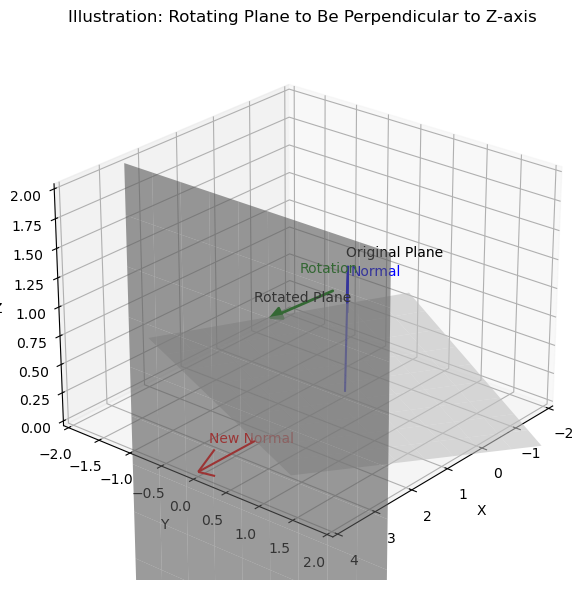

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

# Utility for 3D arrow
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        # project 3D verts to 2D display coords
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()               # <— use the axes projection matrix
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        # required for proper z-ordering
        _, _, zs3d = self._verts3d
        return np.mean(zs3d)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 1) Original tilted plane
plane_size = 2
xx, yy = np.meshgrid(np.linspace(-plane_size, plane_size, 10),
                     np.linspace(-plane_size, plane_size, 10))
zz = 0.5*xx + 0.3*yy
ax.plot_surface(xx, yy, zz, color='lightgray', alpha=0.6, edgecolor='none')
ax.text(0, 0, 1.2, "Original Plane", color='black', fontsize=10)

# 2) Original normal vector
ax.quiver(0, 0, 0, 0.5, 0.3, 1, color='blue', length=1.5, normalize=True)
ax.text(0.6, 0.4, 1.2, "Normal", color='blue')

# 3) Rotated plane (vertical)
yy2, zz2 = np.meshgrid(np.linspace(-plane_size, plane_size, 10),
                       np.linspace(-plane_size, plane_size, 10))
xx2 = np.zeros_like(yy2) + 2.5
ax.plot_surface(xx2, yy2, zz2, color='lightgray', alpha=0.6, edgecolor='none')
ax.text(2.5, 0, 1.2, "Rotated Plane", color='black', fontsize=10)

# 4) New normal (aligned with x-axis)
ax.quiver(2.5, 0, 0, 1, 0, 0, color='red', length=1.5, normalize=True)
ax.text(3.7, 0, 0.2, "New Normal", color='red')

# 5) Conceptual rotation arrow
arrow = Arrow3D([1.2, 2.2], [0.5, 0], [1.2, 1.0],
                mutation_scale=20, lw=2, arrowstyle="-|>", color="green")
ax.add_artist(arrow)
ax.text(1.8, 0.3, 1.4, "Rotation", color='green')

# Axes labels & view
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Illustration: Rotating Plane to Be Perpendicular to Z-axis")
ax.view_init(elev=25, azim=40)
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 2)

plt.tight_layout()
plt.show()


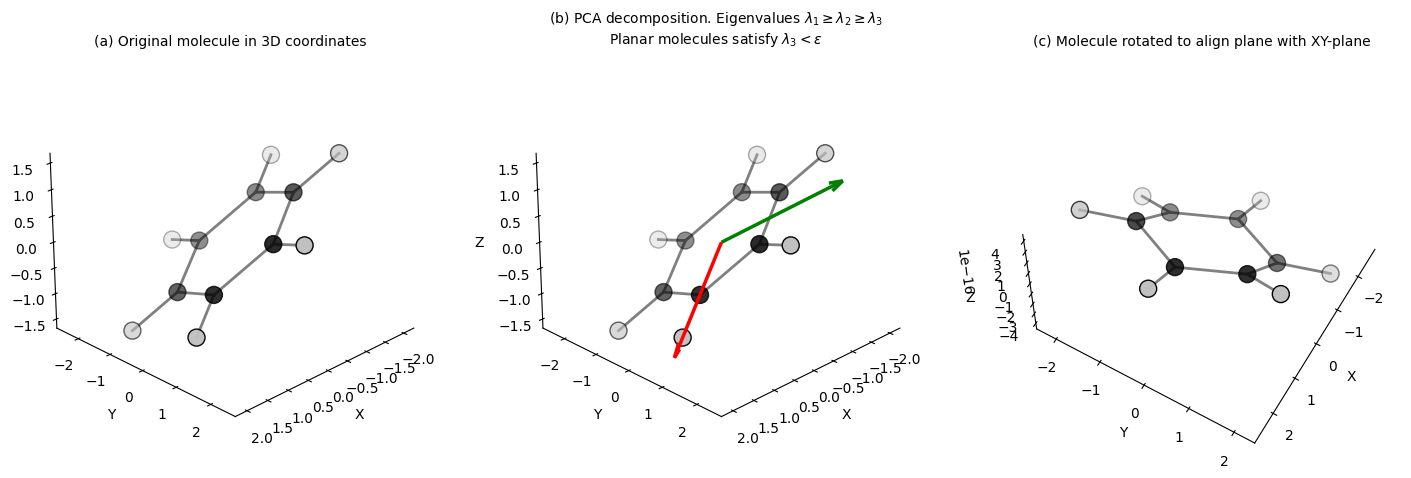

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_molecule(ax, coords, bonds, title, atom_colors, view=(30, 30)):
    """Helper function to plot a molecule on a 3D axis."""
    # Plot atoms
    ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c=atom_colors, s=150, edgecolors='k', depthshade=True)

    # Plot bonds
    for start, end in bonds:
        ax.plot(*zip(coords[start], coords[end]), color='gray', linewidth=2)

    # Set plot aesthetics
    ax.set_title(title, fontsize=10, pad=1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=view[0], azim=view[1])
    ax.set_aspect('auto') # Use 'auto' for better subplot fitting
    # Make panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Remove grid lines
    ax.grid(False)


def main():
    """
    Generates a 3-part illustration showing the PCA-based alignment of a molecule.
    """
    # 1. Define Benzene (C6H6) molecule coordinates (already somewhat planar)
    # This is a simplified, perfectly planar representation for demonstration
    c_coords = np.array([
        [1.39, 0.00, 0.00],
        [0.70, 1.20, 0.00],
        [-0.70, 1.20, 0.00],
        [-1.39, 0.00, 0.00],
        [-0.70, -1.20, 0.00],
        [0.70, -1.20, 0.00]
    ])
    h_coords = np.array([
        [2.47, 0.00, 0.00],
        [1.24, 2.14, 0.00],
        [-1.24, 2.14, 0.00],
        [-2.47, 0.00, 0.00],
        [-1.24, -2.14, 0.00],
        [1.24, -2.14, 0.00]
    ])
    molecule_coords = np.vstack([c_coords, h_coords])
    
    # Introduce a slight random rotation to make the problem non-trivial
    angle = np.pi / 4
    # A rotation matrix around an arbitrary axis [1, 1, 1]
    rot_matrix = np.array([
        [np.cos(angle) + (1-np.cos(angle))/3, (1-np.cos(angle))/3 - np.sin(angle)/np.sqrt(3), (1-np.cos(angle))/3 + np.sin(angle)/np.sqrt(3)],
        [(1-np.cos(angle))/3 + np.sin(angle)/np.sqrt(3), np.cos(angle) + (1-np.cos(angle))/3, (1-np.cos(angle))/3 - np.sin(angle)/np.sqrt(3)],
        [(1-np.cos(angle))/3 - np.sin(angle)/np.sqrt(3), (1-np.cos(angle))/3 + np.sin(angle)/np.sqrt(3), np.cos(angle) + (1-np.cos(angle))/3]
    ])
    original_coords = molecule_coords @ rot_matrix.T

    atom_colors = ['black'] * 6 + ['silver'] * 6
    bonds = [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), # Carbon ring
        (0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11) # C-H bonds
    ]

    # 2. Perform PCA
    # Center the molecule at the origin
    mean_pos = np.mean(original_coords, axis=0)
    centered_coords = original_coords - mean_pos

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_coords, rowvar=False)

    # Get eigenvalues and eigenvectors. eigh is for symmetric matrices.
    # Eigenvalues are sorted from smallest to largest.
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # The eigenvectors are the columns of the `eigenvectors` matrix.
    # `eigenvectors[:, 0]` is the axis with the smallest variance (normal to the plane).
    # `eigenvectors[:, 2]` is the axis with the largest variance.
    
    # 3. Create the rotation matrix to align the molecule
    # We want to align the principal axes with the Cartesian axes.
    # Specifically, the axis with smallest variance (eigenvectors[:, 0]) should become the Z-axis [0,0,1].
    # The axis with largest variance (eigenvectors[:, 2]) should become the X-axis [1,0,0].
    # The rotation matrix `R` is the matrix of eigenvectors.
    # To rotate the data, we multiply by its transpose.
    R = eigenvectors.T
    
    # We need to ensure a right-handed coordinate system.
    if np.linalg.det(R) < 0:
        R[1, :] *= -1 # Flip the Y-axis if the determinant is negative
        
    # Reorder axes: smallest variance -> Z, medium -> Y, largest -> X
    rotation_matrix = np.vstack([R[2], R[1], R[0]])
    
    rotated_coords = centered_coords @ rotation_matrix.T


    # 4. Create the plot
    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')

    # --- Subplot 1: Original Molecule ---
    ax1 = fig.add_subplot(131, projection='3d')
    plot_molecule(ax1, original_coords, bonds,
                  "(a) Original molecule in 3D coordinates", atom_colors, view=(25, 45))

    # --- Subplot 2: PCA Decomposition ---
    ax2 = fig.add_subplot(132, projection='3d')
    plot_molecule(ax2, centered_coords, bonds,
                  r"(b) PCA decomposition. Eigenvalues $\lambda_1 \geq \lambda_2 \geq \lambda_3$" + "\n" + r"Planar molecules satisfy $\lambda_3 < \epsilon$",
                  atom_colors, view=(25, 45))
    # Draw eigenvectors (principal axes)
    axis_colors = ['red', 'green', 'blue'] # Largest to smallest variance
    sorted_indices = np.argsort(eigenvalues)[::-1] # Indices for descending sort
    for i in range(3):
        idx = sorted_indices[i]
        eigenvector = eigenvectors[:, idx]
        eigenvalue = eigenvalues[idx]
        # Scale arrow length by eigenvalue for visualization
        length = np.sqrt(eigenvalue) * 2
        ax2.quiver(0, 0, 0, eigenvector[0], eigenvector[1], eigenvector[2],
                   length=length, color=axis_colors[i], arrow_length_ratio=0.1, linewidth=2.5, label=fr'$\lambda_{i+1}$')


    # --- Subplot 3: Rotated Molecule ---
    ax3 = fig.add_subplot(133, projection='3d')
    plot_molecule(ax3, rotated_coords, bonds,
                  r"(c) Molecule rotated to align plane with XY-plane",
                  atom_colors, view=(60, 30)) # Change view to see the alignment

    plt.tight_layout(pad=3.0)
    plt.savefig("molecule_alignment_illustration.png", dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

if __name__ == '__main__':
    main()


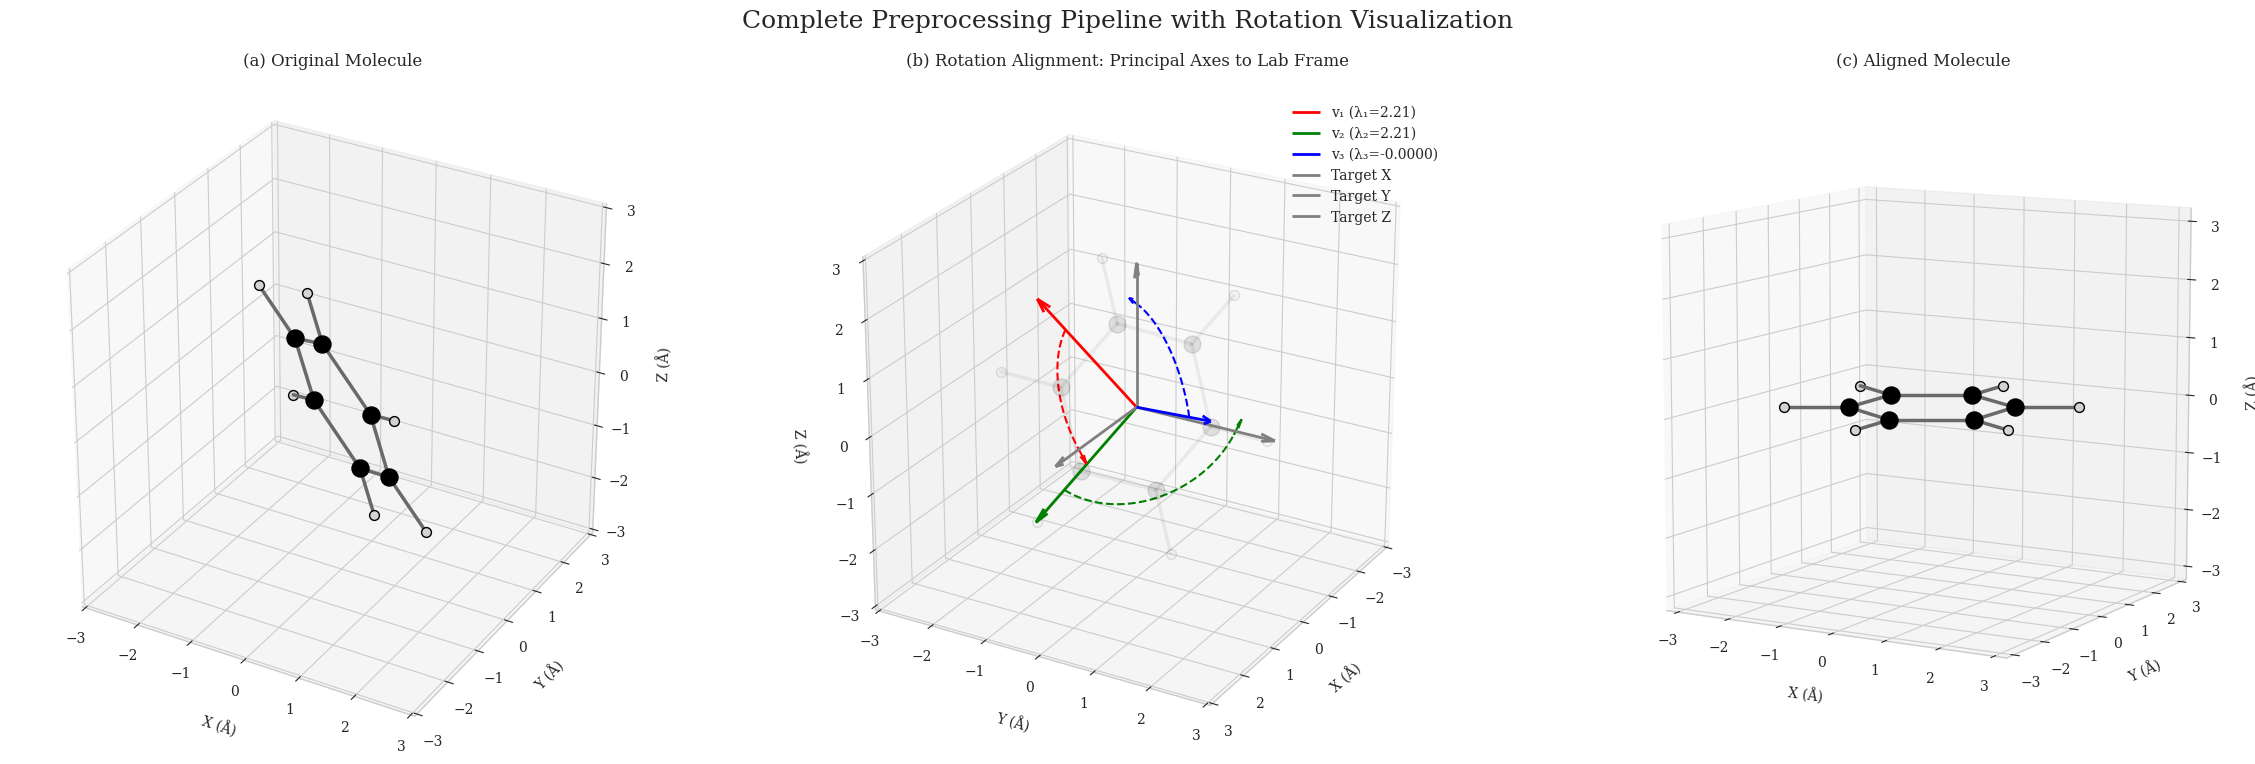

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from ase.build import molecule as ase_molecule

# --- V3: Helper function to draw a 3D rotation arc ---
def draw_rotation_arc(ax, v_start, v_end, radius, color='gray'):
    """Draws a curved arrow showing the rotation from v_start to v_end."""
    v_start = v_start / np.linalg.norm(v_start)
    v_end = v_end / np.linalg.norm(v_end)
    
    # Rotation axis and angle
    cross_prod = np.cross(v_start, v_end)
    # Handle the case where vectors are parallel
    if np.linalg.norm(cross_prod) < 1e-8:
        return
    axis = cross_prod / np.linalg.norm(cross_prod)
    angle = np.arccos(np.dot(v_start, v_end))
    
    # Generate points for the arc
    arc_points = []
    for theta in np.linspace(0, angle, 50):
        # Rodrigues' rotation formula
        rotated_v = v_start * np.cos(theta) + \
                    np.cross(axis, v_start) * np.sin(theta) + \
                    axis * np.dot(axis, v_start) * (1 - np.cos(theta))
        arc_points.append(rotated_v * radius)
    
    arc = np.array(arc_points)
    ax.plot(arc[:, 0], arc[:, 1], arc[:, 2], color=color, linestyle='--')
    
    # Add an arrowhead at the end
    # Ensure there are enough points to draw an arrow
    if len(arc) > 1:
      ax.quiver(arc[-2, 0], arc[-2, 1], arc[-2, 2], 
                arc[-1, 0] - arc[-2, 0], arc[-1, 1] - arc[-2, 1], arc[-1, 2] - arc[-2, 2],
                color=color, arrow_length_ratio=0.5, normalize=True, length=0.3)


# --- Corrected helper function to plot with equal aspect ratio ---
def plot_molecule_corrected(ax, atoms_obj, title=""):
    """Plots a ball-and-stick model ensuring an equal aspect ratio."""
    positions = atoms_obj.get_positions()
    center = positions.mean(axis=0)
    max_range = np.ptp(positions, axis=0).max()
    # Add a buffer to the range
    half_range = max_range / 2.0 * 1.3 
    ax.set_xlim(center[0] - half_range, center[0] + half_range)
    ax.set_ylim(center[1] - half_range, center[1] + half_range)
    ax.set_zlim(center[2] - half_range, center[2] + half_range)
    ax.set_box_aspect([1, 1, 1])

    symbols = atoms_obj.get_chemical_symbols()
    atom_colors = {'C': 'black', 'H': 'lightgray'}
    atom_sizes = {'C': 150, 'H': 50}
    num_atoms = len(atoms_obj)
    # Draw bonds
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = atoms_obj.get_distance(i, j)
            # Simple bonding logic
            if (symbols[i] == 'C' and symbols[j] == 'C' and distance < 1.5) or \
               (symbols[i] in ['C', 'H'] and symbols[j] in ['C', 'H'] and distance < 1.2):
                ax.plot(*zip(positions[i], positions[j]), color='dimgray', linewidth=2.5)
    # Draw atoms
    for i, (pos, sym) in enumerate(zip(positions, symbols)):
        ax.scatter(*pos, s=atom_sizes.get(sym, 50), c=atom_colors.get(sym, 'blue'), 
                   depthshade=True, edgecolor='black')
    ax.set_title(title, pad=20)
    ax.set_xlabel("X (Å)"), ax.set_ylabel("Y (Å)"), ax.set_zlabel("Z (Å)")

# --- Main Script ---
# 1. Setup Molecule
benzene_ase = ase_molecule("C6H6")
# Apply a random rotation to have a non-aligned starting point
random_rotation = Rotation.from_euler('zyx', [65, -30, 110], degrees=True).as_matrix()
benzene_ase.positions = benzene_ase.positions @ random_rotation.T
benzene_ase.center()

# 2. PCA
coords_centered = benzene_ase.get_positions()
covariance_matrix = np.cov(coords_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
# Sort eigenvalues and eigenvectors from largest to smallest
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

# 3. Create Rotated Molecule
# The rotation matrix is the transpose of the eigenvector matrix
rotation_matrix = eigenvectors.T
benzene_rotated_ase = benzene_ase.copy()
# Apply the rotation
benzene_rotated_ase.positions = (rotation_matrix @ coords_centered.T).T

# 4. Generate the Final Diagram
fig = plt.figure(figsize=(24, 8))
fig.suptitle("Complete Preprocessing Pipeline with Rotation Visualization", fontsize=18)

# Panel (a): Original Molecule
ax1 = fig.add_subplot(131, projection='3d')
plot_molecule_corrected(ax1, benzene_ase, title="(a) Original Molecule")

# Panel (b): PCA and Rotation Alignment
ax2 = fig.add_subplot(132, projection='3d')
plot_molecule_corrected(ax2, benzene_ase, title="(b) Rotation Alignment: Principal Axes to Lab Frame")
# Make the original molecule faint to highlight the axes
for artist in ax2.collections: artist.set_alpha(0.1)
for line in ax2.lines: line.set_alpha(0.1)

# Draw principal axes (v1, v2, v3)
origin = np.zeros(3)
arrow_colors = ['r', 'g', 'b']
principal_axes_labels = [f'v₁ (λ₁={eigenvalues[0]:.2f})', f'v₂ (λ₂={eigenvalues[1]:.2f})', f'v₃ (λ₃={eigenvalues[2]:.4f})']
for i in range(3):
    length = 2.5
    ax2.quiver(origin[0], origin[1], origin[2],
               eigenvectors[0, i] * length, eigenvectors[1, i] * length, eigenvectors[2, i] * length,
               color=arrow_colors[i], label=principal_axes_labels[i], arrow_length_ratio=0.1, linewidth=2)

# Draw target lab axes (X, Y, Z)
target_axes = np.eye(3)
target_axes_labels = ['Target X', 'Target Y', 'Target Z']
for i in range(3):
    ax2.quiver(origin[0], origin[1], origin[2],
               target_axes[i, 0] * length, target_axes[i, 1] * length, target_axes[i, 2] * length,
               color='gray', arrow_length_ratio=0.1, linewidth=2, label=target_axes_labels[i])

# Draw rotation arcs
draw_rotation_arc(ax2, eigenvectors[:, 0], target_axes[0], radius=1.8, color='r')
draw_rotation_arc(ax2, eigenvectors[:, 1], target_axes[1], radius=1.8, color='g')
draw_rotation_arc(ax2, eigenvectors[:, 2], target_axes[2], radius=1.8, color='b')

# --- FIX STARTS HERE ---
# Re-apply the axis limits and aspect ratio based on the molecule's dimensions.
# This overrides the automatic scaling caused by adding the quiver arrows and arcs.
positions = benzene_ase.get_positions()
center = positions.mean(axis=0)
max_range = np.ptp(positions, axis=0).max()
half_range = max_range / 2.0 * 1.3
ax2.set_xlim(center[0] - half_range, center[0] + half_range)
ax2.set_ylim(center[1] - half_range, center[1] + half_range)
ax2.set_zlim(center[2] - half_range, center[2] + half_range)
ax2.set_box_aspect([1, 1, 1])
# --- FIX ENDS HERE ---

ax2.legend()
ax2.view_init(elev=25, azim=30) # Adjust view to see arcs clearly

# Panel (c): Rotated Molecule
ax3 = fig.add_subplot(133, projection='3d')
plot_molecule_corrected(ax3, benzene_rotated_ase, title="(c) Aligned Molecule")
ax3.view_init(elev=10, azim=-60)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

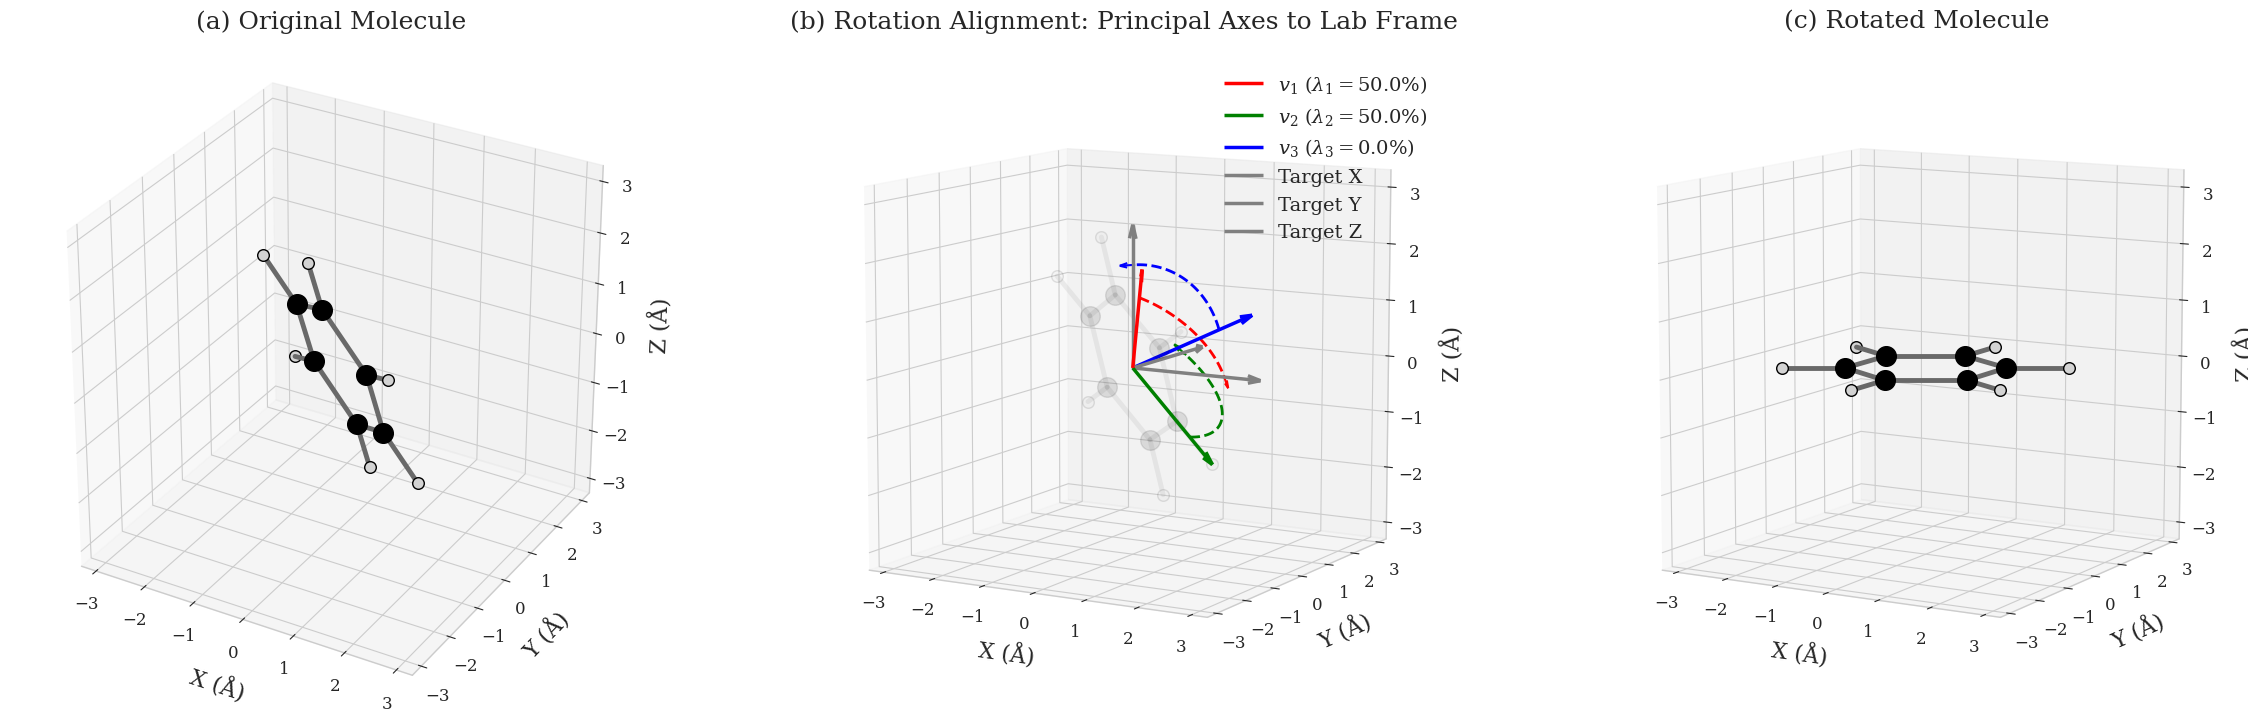

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from ase.build import molecule as ase_molecule

# --- NEW: Global Matplotlib Settings for Increased Visibility ---
plt.rcParams.update({
    'font.size': 14,          # Base font size for all text
    'axes.labelsize': 16,     # Font size for X, Y, Z labels
    'xtick.labelsize': 12,    # Font size for tick labels on X-axis
    'ytick.labelsize': 12,    # Font size for tick labels on Y-axis
    'figure.facecolor': 'white' # Set a white background for saving
})

# --- Helper: Draw a 3D rotation arc ---
def draw_rotation_arc(ax, v_start, v_end, radius, color='gray'):
    """Draw a curved arrow showing the rotation from v_start to v_end."""
    v_start = v_start / np.linalg.norm(v_start)
    v_end = v_end / np.linalg.norm(v_end)
    
    cross_prod = np.cross(v_start, v_end)
    if np.linalg.norm(cross_prod) < 1e-8: return
    axis = cross_prod / np.linalg.norm(cross_prod)
    angle = np.arccos(np.dot(v_start, v_end))
    
    arc_points = []
    for theta in np.linspace(0, angle, 50):
        rotated_v = (v_start * np.cos(theta) +
                     np.cross(axis, v_start) * np.sin(theta) +
                     axis * np.dot(axis, v_start) * (1 - np.cos(theta)))
        arc_points.append(rotated_v * radius)
    
    arc = np.array(arc_points)
    # MODIFIED: Thicker arc line
    ax.plot(arc[:, 0], arc[:, 1], arc[:, 2], color=color, linestyle='--', linewidth=2)
    
    if len(arc) > 1:
        ax.quiver(arc[-2, 0], arc[-2, 1], arc[-2, 2],
                  arc[-1, 0] - arc[-2, 0], arc[-1, 1] - arc[-2, 1], arc[-1, 2] - arc[-2, 2],
                  color=color, arrow_length_ratio=0.5, normalize=True, length=0.3)

# --- Helper: Plot molecule ---
def plot_molecule(ax, atoms_obj, title=""):
    """Plots a ball-and-stick model."""
    positions = atoms_obj.get_positions()
    symbols = atoms_obj.get_chemical_symbols()
    atom_colors = {'C': 'black', 'H': 'lightgray'}
    atom_sizes = {'C': 200, 'H': 70} # MODIFIED: Larger atoms
    num_atoms = len(atoms_obj)
    
    # Bonds
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = atoms_obj.get_distance(i, j)
            if (symbols[i] == 'C' and symbols[j] == 'C' and distance < 1.5) or \
               (symbols[i] in ['C', 'H'] and symbols[j] in ['C', 'H'] and distance < 1.2):
                # MODIFIED: Thicker bonds
                ax.plot(*zip(positions[i], positions[j]), color='dimgray', linewidth=3.5)
    
    # Atoms
    for pos, sym in zip(positions, symbols):
        ax.scatter(*pos, s=atom_sizes.get(sym, 50), c=atom_colors.get(sym, 'blue'),
                   depthshade=True, edgecolor='black')
    
    # MODIFIED: Larger title font size
    ax.set_title(title, pad=20, fontsize=18)
    ax.set_xlabel("X (Å)"), ax.set_ylabel("Y (Å)"), ax.set_zlabel("Z (Å)")

# --- Helper: Set global axis config ---
def set_axis_equal(ax, center, half_range):
    ax.set_xlim(center[0] - half_range, center[0] + half_range)
    ax.set_ylim(center[1] - half_range, center[1] + half_range)
    ax.set_zlim(center[2] - half_range, center[2] + half_range)
    ax.set_box_aspect([1, 1, 1])

# === Main Script ===

# 1. Setup Molecule
benzene = ase_molecule("C6H6")
random_rotation = Rotation.from_euler('zyx', [65, -30, 110], degrees=True).as_matrix()
benzene.positions = benzene.positions @ random_rotation.T
benzene.center()

# 2. PCA
coords_centered = benzene.get_positions()
cov_matrix = np.cov(coords_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:, sort_idx]
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)

# 3. Create Rotated Molecule
rotation_matrix = eigenvectors.T
benzene_rotated = benzene.copy()
benzene_rotated.positions = (rotation_matrix @ coords_centered.T).T

# 4. Compute global axis limits
positions = benzene.get_positions()
center = positions.mean(axis=0)
max_range = np.ptp(positions, axis=0).max()
half_range = max_range / 2.0 * 1.4

# 5. Plot
fig = plt.figure(figsize=(24, 8))
# MODIFIED: Added a main title with large font
#fig.suptitle("Visualization of Molecular Alignment via PCA", fontsize=22, weight='bold')

# (a) Original Molecule
ax1 = fig.add_subplot(131, projection='3d')
plot_molecule(ax1, benzene, title="(a) Original Molecule")
set_axis_equal(ax1, center, half_range)

# (b) PCA and Rotation Alignment
ax2 = fig.add_subplot(132, projection='3d')
plot_molecule(ax2, benzene, title="(b) Rotation Alignment: Principal Axes to Lab Frame")
for artist in ax2.collections: artist.set_alpha(0.1)
for line in ax2.lines: line.set_alpha(0.1)

origin = np.zeros(3)
arrow_colors = ['r', 'g', 'b']
principal_axes_labels = [
    rf"$v_1\ (\lambda_1 = {normalized_eigenvalues[0]*100:.1f}\%)$",
    rf"$v_2\ (\lambda_2 = {normalized_eigenvalues[1]*100:.1f}\%)$",
    rf"$v_3\ (\lambda_3 = {np.abs(normalized_eigenvalues[2])*100:.1f}\%)$"
]
 
for i in range(3):
    length = 2.5
    # MODIFIED: Thicker quiver arrows
    ax2.quiver(origin[0], origin[1], origin[2],
               eigenvectors[0, i] * length, eigenvectors[1, i] * length, eigenvectors[2, i] * length,
               color=arrow_colors[i], label=principal_axes_labels[i],
               arrow_length_ratio=0.1, linewidth=2.5)

target_axes = np.eye(3)
target_labels = ['Target X', 'Target Y', 'Target Z']
for i in range(3):
    # MODIFIED: Thicker quiver arrows
    ax2.quiver(origin[0], origin[1], origin[2],
               target_axes[i, 0] * length, target_axes[i, 1] * length, target_axes[i, 2] * length,
               color='gray', arrow_length_ratio=0.1, linewidth=2.5, label=target_labels[i])

draw_rotation_arc(ax2, eigenvectors[:, 0], target_axes[0], radius=1.8, color='r')
draw_rotation_arc(ax2, eigenvectors[:, 1], target_axes[1], radius=1.8, color='g')
draw_rotation_arc(ax2, eigenvectors[:, 2], target_axes[2], radius=1.8, color='b')

set_axis_equal(ax2, center, half_range)
# MODIFIED: Larger legend font size
ax2.legend(fontsize=14)
ax2.view_init(elev=10, azim=-60)

# (c) Rotated Molecule
ax3 = fig.add_subplot(133, projection='3d')
plot_molecule(ax3, benzene_rotated, title="(c) Rotated Molecule")
set_axis_equal(ax3, center, half_range)
ax3.view_init(elev=10, azim=-60)

plt.tight_layout(rect=[0, 0.05, 1, 0.92]) # Adjust rect to make space for suptitle
# MODIFIED: Higher DPI for better quality saved image
plt.savefig('pca_rotate.png', dpi=300, bbox_inches='tight')
plt.show()



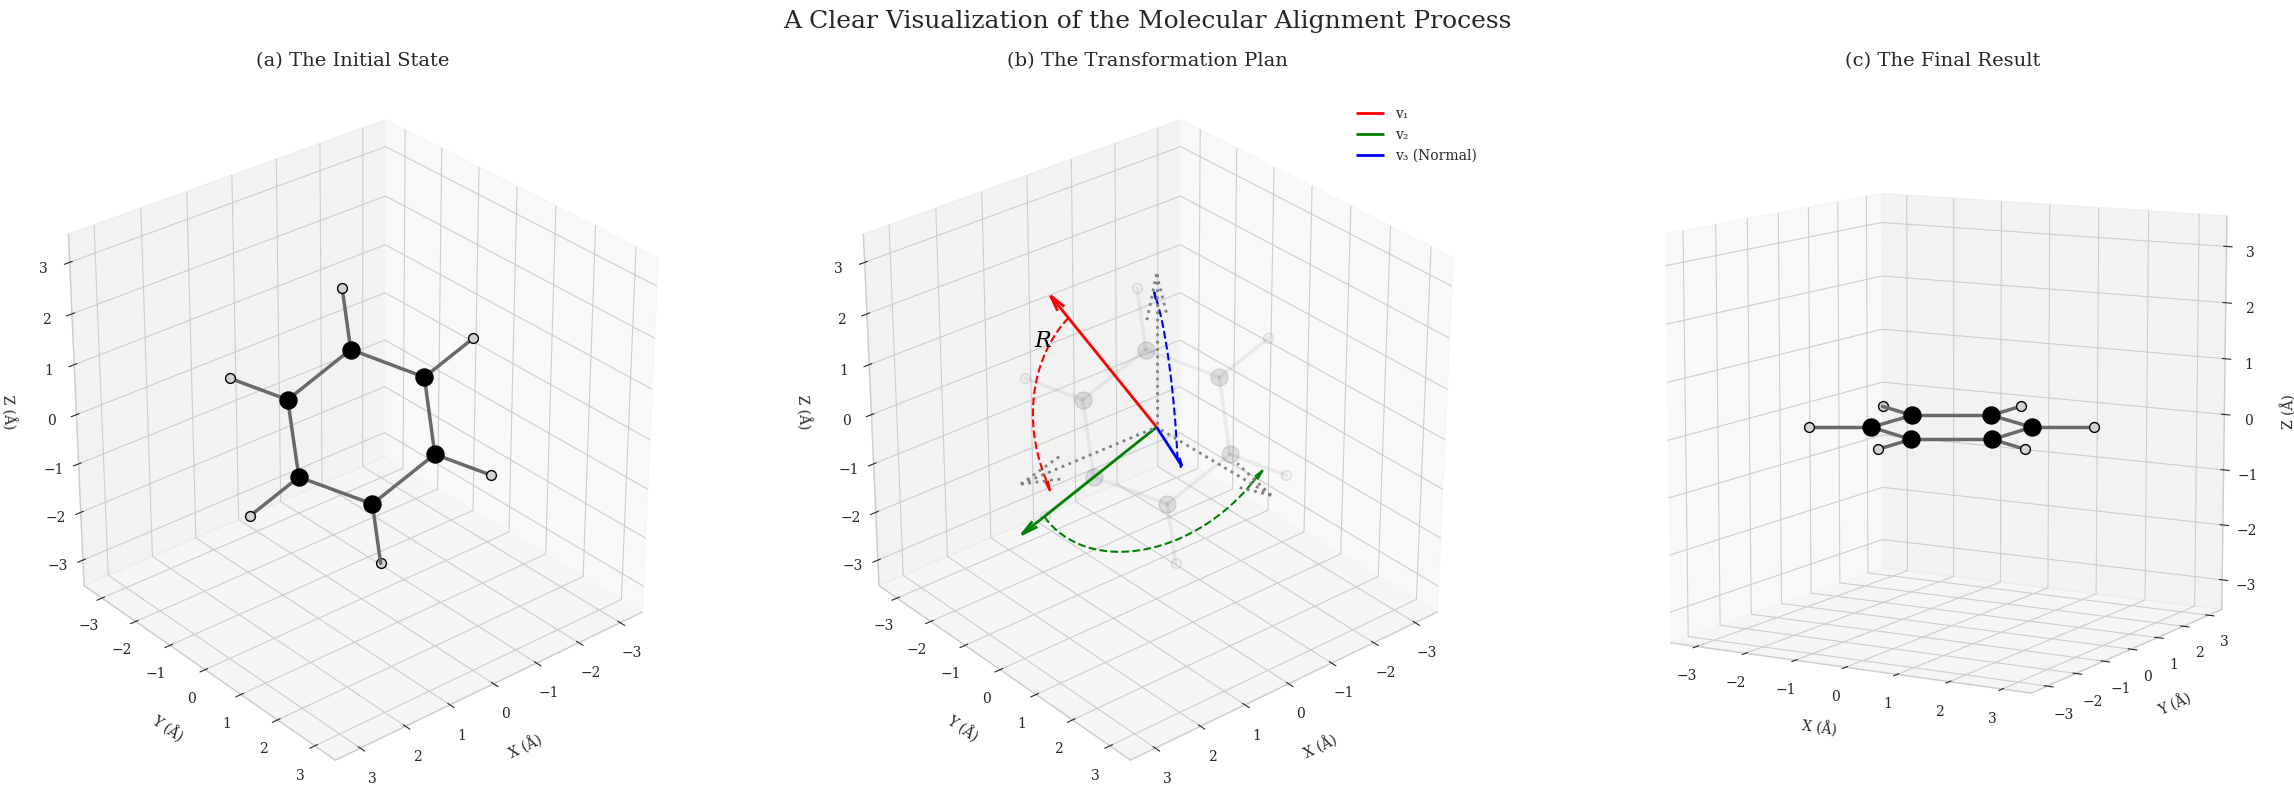

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from ase.build import molecule as ase_molecule

# --- Helper: Draw a correct 3D rotation arc ---
def draw_rotation_arc(ax, v_start, v_end, radius, color='k'):
    """Draws a mathematically correct 3D arc between two vectors."""
    v_start = v_start / np.linalg.norm(v_start)
    v_end = v_end / np.linalg.norm(v_end)
    
    axis = np.cross(v_start, v_end)
    axis_norm = np.linalg.norm(axis)
    if axis_norm < 1e-8: return # Vectors are parallel
    
    axis /= axis_norm
    angle = np.arccos(np.dot(v_start, v_end))
    
    theta_steps = np.linspace(0, angle, 50)
    arc_points = np.array([
        (v_start * np.cos(theta) + np.cross(axis, v_start) * np.sin(theta) + 
         axis * np.dot(axis, v_start) * (1 - np.cos(theta))) * radius
        for theta in theta_steps
    ])
    
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color=color, linestyle='--', linewidth=1.5)
    
    end_dir = arc_points[-1] - arc_points[-2]
    ax.quiver(arc_points[-1, 0], arc_points[-1, 1], arc_points[-1, 2],
              end_dir[0], end_dir[1], end_dir[2],
              color=color, arrow_length_ratio=0.6, normalize=True, length=0.3)

# --- Helper: Plot molecule with optional transparency (CORRECTED) ---
def plot_molecule(ax, atoms_obj, title="", alpha=1.0):
    """Plots a ball-and-stick model."""
    positions = atoms_obj.get_positions()
    symbols = atoms_obj.get_chemical_symbols()
    atom_colors = {'C': 'black', 'H': 'lightgray'}
    atom_sizes = {'C': 150, 'H': 50}
    num_atoms = len(atoms_obj)
    
    # ***** THIS IS THE CORRECTED SECTION FOR DRAWING BONDS *****
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms): # Use i + 1 to avoid double counting and self-bonding
            distance = atoms_obj.get_distance(i, j)
            # Use distance cutoffs to determine if a bond exists
            if (symbols[i] == 'C' and symbols[j] == 'C' and distance < 1.5) or \
               (symbols[i] in ['C', 'H'] and symbols[j] in ['C', 'H'] and distance < 1.2):
                ax.plot(*zip(positions[i], positions[j]), color='dimgray', linewidth=2.5, alpha=alpha)

    # Draw atoms
    for pos, sym in zip(positions, symbols):
        ax.scatter(*pos, s=atom_sizes.get(sym, 50), c=atom_colors.get(sym, 'blue'),
                   depthshade=True, edgecolor='black', alpha=alpha)
    
    ax.set_title(title, pad=20, fontsize=14)
    ax.set_xlabel("X (Å)"), ax.set_ylabel("Y (Å)"), ax.set_zlabel("Z (Å)")

# --- Helper: Set consistent, equal axis limits ---
def set_axis_equal(ax, center, half_range):
    ax.set_xlim(center[0] - half_range, center[0] + half_range)
    ax.set_ylim(center[1] - half_range, center[1] + half_range)
    ax.set_zlim(center[2] - half_range, center[2] + half_range)
    ax.set_box_aspect([1, 1, 1])

# === Main Script ===

# 1. Setup Molecule
benzene = ase_molecule("C6H6")
fixed_rotation = Rotation.from_euler('zyx', [65, -30, 110], degrees=True).as_matrix()
benzene.positions = benzene.positions @ fixed_rotation.T
benzene.center()

# 2. PCA
coords_centered = benzene.get_positions()
cov_matrix = np.cov(coords_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:, sort_idx]

# 3. Create Rotated Molecule
rotation_matrix = eigenvectors.T
benzene_rotated = benzene.copy()
benzene_rotated.positions = (rotation_matrix @ coords_centered.T).T

# 4. Compute global axis limits for all subplots
positions = benzene.get_positions()
center = positions.mean(axis=0)
max_range = np.ptp(positions, axis=0).max()
half_range = max_range / 2.0 * 1.5

# 5. Plotting
fig = plt.figure(figsize=(24, 8))
fig.suptitle("A Clear Visualization of the Molecular Alignment Process", fontsize=18)

# (a) The Initial State
ax1 = fig.add_subplot(131, projection='3d')
plot_molecule(ax1, benzene, title="(a) The Initial State")
set_axis_equal(ax1, center, half_range)
ax1.view_init(elev=30, azim=50)
viewpoint = {'elev': ax1.elev, 'azim': ax1.azim} # Capture viewpoint

# (b) The Transformation Plan
ax2 = fig.add_subplot(132, projection='3d')
plot_molecule(ax2, benzene, title="(b) The Transformation Plan", alpha=0.1)
set_axis_equal(ax2, center, half_range)
ax2.view_init(**viewpoint) # Use IDENTICAL viewpoint

# Draw principal axes (the "body frame")
origin = np.zeros(3)
arrow_colors = ['r', 'g', 'b']
labels = ['v₁', 'v₂', 'v₃ (Normal)']
for i in range(3):
    ax2.quiver(origin[0], origin[1], origin[2],
               eigenvectors[0, i] * 3, eigenvectors[1, i] * 3, eigenvectors[2, i] * 3,
               color=arrow_colors[i], label=labels[i], arrow_length_ratio=0.1, linewidth=2)

# Draw target axes (the "lab frame")
target_axes = np.eye(3)
for i in range(3):
    ax2.quiver(origin[0], origin[1], origin[2],
               target_axes[i, 0] * 3, target_axes[i, 1] * 3, target_axes[i, 2] * 3,
               color='gray', linestyle=':', linewidth=2)

# Draw rotation arcs to show the PLAN
draw_rotation_arc(ax2, eigenvectors[:, 0], target_axes[0], radius=2.5, color='r')
draw_rotation_arc(ax2, eigenvectors[:, 1], target_axes[1], radius=2.5, color='g')
draw_rotation_arc(ax2, eigenvectors[:, 2], target_axes[2], radius=2.5, color='b')
ax2.text(1.5, -1.5, 1.5, "R", fontsize=16, color='k', style='italic')
ax2.legend()

# (c) The Final Result
ax3 = fig.add_subplot(133, projection='3d')
plot_molecule(ax3, benzene_rotated, title="(c) The Final Result")
set_axis_equal(ax3, center, half_range)
ax3.view_init(elev=10, azim=-60) # Use a new viewpoint to best show the final alignment

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from ase.build import molecule as ase_molecule

# --- Helper: Draw a 3D rotation arc ---
def draw_rotation_arc(ax, v_start, v_end, radius, color='gray'):
    """Draw a curved arrow showing the rotation from v_start to v_end."""
    v_start = v_start / np.linalg.norm(v_start)
    v_end = v_end / np.linalg.norm(v_end)

    cross_prod = np.cross(v_start, v_end)
    if np.linalg.norm(cross_prod) < 1e-8:  # Parallel (or anti-parallel) vectors
        return
    axis = cross_prod / np.linalg.norm(cross_prod)
    # numeric safety for dot
    cosang = np.clip(np.dot(v_start, v_end), -1.0, 1.0)
    angle = np.arccos(cosang)

    arc_points = []
    for theta in np.linspace(0, angle, 60):
        rotated_v = (v_start * np.cos(theta) +
                     np.cross(axis, v_start) * np.sin(theta) +
                     axis * np.dot(axis, v_start) * (1 - np.cos(theta)))
        arc_points.append(rotated_v * radius)

    arc = np.array(arc_points)
    ax.plot(arc[:, 0], arc[:, 1], arc[:, 2], color=color, linestyle='--')

    if len(arc) > 1:
        # draw a small arrowhead from the penultimate to last point
        vec = arc[-1] - arc[-2]
        ax.quiver(arc[-2, 0], arc[-2, 1], arc[-2, 2],
                  vec[0], vec[1], vec[2],
                  color=color, arrow_length_ratio=0.4, normalize=True, length=0.25)

# --- Helper: Plot molecule ---
def plot_molecule(ax, atoms_obj, title=""):
    """Plots a ball-and-stick model (simple heuristic bonds)."""
    positions = atoms_obj.get_positions()
    symbols = atoms_obj.get_chemical_symbols()
    atom_colors = {'C': 'black', 'H': 'lightgray'}
    atom_sizes = {'C': 150, 'H': 50}
    num_atoms = len(atoms_obj)

    # Bonds (simple distance-based heuristic)
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = atoms_obj.get_distance(i, j)
            if (symbols[i] == 'C' and symbols[j] == 'C' and distance < 1.5) or \
               (symbols[i] in ['C', 'H'] and symbols[j] in ['C', 'H'] and distance < 1.2):
                ax.plot(*zip(positions[i], positions[j]), color='dimgray', linewidth=2.2, zorder=1)

    # Atoms
    for pos, sym in zip(positions, symbols):
        ax.scatter(*pos,
                   s=atom_sizes.get(sym, 50),
                   c=atom_colors.get(sym, 'blue'),
                   depthshade=True,
                   edgecolor='black',
                   zorder=2)

    ax.set_title(title, pad=12)
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")

# --- Helper: Set global axis config ---
def set_axis_equal(ax, center, half_range):
    ax.set_xlim(center[0] - half_range, center[0] + half_range)
    ax.set_ylim(center[1] - half_range, center[1] + half_range)
    ax.set_zlim(center[2] - half_range, center[2] + half_range)
    ax.set_box_aspect([1, 1, 1])

# === Main Script ===

# 1. Setup Molecule and apply a random rotation for a non-aligned start
benzene = ase_molecule("C6H6")
random_rotation = Rotation.from_euler('zyx', [65, -30, 110], degrees=True).as_matrix()
benzene.positions = benzene.positions @ random_rotation.T
benzene.center()

# 2. PCA
coords_centered = benzene.get_positions()  # already centred by benzene.center()
cov_matrix = np.cov(coords_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# Sort descending
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:, sort_idx]

# 3. Normalise eigenvalues -> fraction (variance explained)
explained_variance = eigenvalues / np.sum(eigenvalues)  # sums to 1

# 4. Create rotated (PCA-aligned) molecule
rotation_matrix = eigenvectors.T
benzene_rotated = benzene.copy()
benzene_rotated.positions = (rotation_matrix @ coords_centered.T).T

# 5. Global axis limits (apply to all subplots so they match)
positions = benzene.get_positions()
center = positions.mean(axis=0)
max_range = np.ptp(positions, axis=0).max()
half_range = max_range / 2.0 * 1.3

# 6. Plotting: show normalized eigenvalues (as percentages) and scale arrow lengths by variance explained
fig = plt.figure(figsize=(24, 8))
fig.suptitle("PCA alignment: normalized eigenvalues (variance explained) and rotation", fontsize=16)

# (a) Original Molecule
ax1 = fig.add_subplot(131, projection='3d')
plot_molecule(ax1, benzene, title="(a) Original Molecule")
set_axis_equal(ax1, center, half_range)
ax1.view_init(elev=20, azim=30)

# (b) PCA and Rotation Alignment (with scaled arrows)
ax2 = fig.add_subplot(132, projection='3d')
plot_molecule(ax2, benzene, title="(b) Rotation Alignment: Principal Axes → Lab Frame")
# make the molecule faint so axes stand out
for artist in ax2.collections: artist.set_alpha(0.12)
for line in ax2.lines: line.set_alpha(0.12)

origin = np.zeros(3)
# Visual scaling: base length and scale by explained_variance (keeps differences visible)
base_length = 2.5
# Prevent extremely short arrows by adding a small offset
lengths = base_length * (0.6 + 2.5 * explained_variance)

axis_colors = ['r', 'g', 'b']
principal_axes_labels = [
    f'v₁ ({explained_variance[0]*100:.1f}%)',
    f'v₂ ({explained_variance[1]*100:.1f}%)',
    f'v₃ ({explained_variance[2]*100:.1f}%)'
]

for i in range(3):
    vec = eigenvectors[:, i]
    L = lengths[i]
    ax2.quiver(origin[0], origin[1], origin[2],
               vec[0] * L, vec[1] * L, vec[2] * L,
               color=axis_colors[i], linewidth=2.2,
               arrow_length_ratio=0.12, normalize=False,
               label=principal_axes_labels[i])

# Target lab axes (reference) - drawn at a consistent base length
target_axes = np.eye(3)
target_labels = ['Target X', 'Target Y', 'Target Z']
for i in range(3):
    ax2.quiver(origin[0], origin[1], origin[2],
               target_axes[i, 0] * base_length, target_axes[i, 1] * base_length, target_axes[i, 2] * base_length,
               color='gray', linewidth=1.6, arrow_length_ratio=0.12, normalize=False,
               linestyle='-', label=target_labels[i])

# Rotation arcs (show how each principal axis rotates to the corresponding target axis)
draw_rotation_arc(ax2, eigenvectors[:, 0], target_axes[0], radius=1.6, color='r')
draw_rotation_arc(ax2, eigenvectors[:, 1], target_axes[1], radius=1.6, color='g')
draw_rotation_arc(ax2, eigenvectors[:, 2], target_axes[2], radius=1.6, color='b')

set_axis_equal(ax2, center, half_range)
# Improve legend: combine principal axes and target axes in a readable order
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
ax2.view_init(elev=25, azim=30)

# (c) Rotated Molecule aligned to PCA axes
ax3 = fig.add_subplot(133, projection='3d')
plot_molecule(ax3, benzene_rotated, title="(c) Aligned Molecule (PCA frame)")
set_axis_equal(ax3, center, half_range)
ax3.view_init(elev=10, azim=-60)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from ase.build import molecule as ase_molecule

# --- NEW: Global Matplotlib Settings for Increased Visibility ---
plt.rcParams.update({
    'font.size': 14,          # Base font size for all text
    'axes.labelsize': 16,     # Font size for X, Y, Z labels
    'xtick.labelsize': 12,    # Font size for tick labels on X-axis
    'ytick.labelsize': 12,    # Font size for tick labels on Y-axis
    'figure.facecolor': 'white' # Set a white background for saving
})

# --- Helper: Draw a 3D rotation arc ---
def draw_rotation_arc(ax, v_start, v_end, radius, color='gray'):
    """Draw a curved arrow showing the rotation from v_start to v_end."""
    v_start = v_start / np.linalg.norm(v_start)
    v_end = v_end / np.linalg.norm(v_end)
    
    cross_prod = np.cross(v_start, v_end)
    if np.linalg.norm(cross_prod) < 1e-8: return
    axis = cross_prod / np.linalg.norm(cross_prod)
    angle = np.arccos(np.dot(v_start, v_end))
    
    arc_points = []
    for theta in np.linspace(0, angle, 50):
        rotated_v = (v_start * np.cos(theta) +
                     np.cross(axis, v_start) * np.sin(theta) +
                     axis * np.dot(axis, v_start) * (1 - np.cos(theta)))
        arc_points.append(rotated_v * radius)
    
    arc = np.array(arc_points)
    ax.plot(arc[:, 0], arc[:, 1], arc[:, 2], color=color, linestyle='--', linewidth=2)
    
    if len(arc) > 1:
        ax.quiver(arc[-2, 0], arc[-2, 1], arc[-2, 2],
                  arc[-1, 0] - arc[-2, 0], arc[-1, 1] - arc[-2, 1], arc[-1, 2] - arc[-2, 2],
                  color=color, arrow_length_ratio=0.5, normalize=True, length=0.3)

# --- Helper: Plot molecule ---
def plot_molecule(ax, atoms_obj, title=""):
    """Plots a ball-and-stick model."""
    positions = atoms_obj.get_positions()
    symbols = atoms_obj.get_chemical_symbols()
    atom_colors = {'C': 'black', 'H': 'lightgray'}
    atom_sizes = {'C': 200, 'H': 70}
    num_atoms = len(atoms_obj)
    
    # Bonds
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = atoms_obj.get_distance(i, j)
            if (symbols[i] == 'C' and symbols[j] == 'C' and distance < 1.5) or \
               (symbols[i] in ['C', 'H'] and symbols[j] in ['C', 'H'] and distance < 1.2):
                ax.plot(*zip(positions[i], positions[j]), color='dimgray', linewidth=3.5)
    
    # Atoms
    for pos, sym in zip(positions, symbols):
        ax.scatter(*pos, s=atom_sizes.get(sym, 50), c=atom_colors.get(sym, 'blue'),
                   depthshade=True, edgecolor='black')
    
    #ax.set_title(title, pad=20, fontsize=20, weight='bold')
    ax.set_xlabel("X (Å)"), ax.set_ylabel("Y (Å)"), ax.set_zlabel("Z (Å)")

# --- Helper: Set global axis config ---
def set_axis_equal(ax, center, half_range):
    ax.set_xlim(center[0] - half_range, center[0] + half_range)
    ax.set_ylim(center[1] - half_range, center[1] + half_range)
    ax.set_zlim(center[2] - half_range, center[2] + half_range)
    ax.set_box_aspect([1, 1, 1])

# === Main Script ===

# 1. Setup Molecule
benzene = ase_molecule("C6H6")
random_rotation = Rotation.from_euler('zyx', [65, -30, 110], degrees=True).as_matrix()
benzene.positions = benzene.positions @ random_rotation.T
benzene.center()

# 2. PCA
coords_centered = benzene.get_positions()
cov_matrix = np.cov(coords_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:, sort_idx]
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)

# 3. Create Rotated Molecule
rotation_matrix = eigenvectors.T
benzene_rotated = benzene.copy()
benzene_rotated.positions = (rotation_matrix @ coords_centered.T).T

# 4. Compute global axis limits
positions = benzene.get_positions()
center = positions.mean(axis=0)
max_range = np.ptp(positions, axis=0).max()
half_range = max_range / 2.0 * 1.4

# === Plotting Section: Save 3 Separate Figures ===

# --- Figure (a): Original Molecule ---
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111, projection='3d')
plot_molecule(ax1, benzene, title="(a) Original Molecule")
set_axis_equal(ax1, center, half_range)
plt.tight_layout()
plt.savefig('figure_a_original_molecule.png', dpi=300, bbox_inches='tight')
plt.close(fig1)

# --- Figure (b): PCA and Rotation Alignment ---
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')
plot_molecule(ax2, benzene, title="(b) Transformation Plan")
for artist in ax2.collections: artist.set_alpha(0.1)
for line in ax2.lines: line.set_alpha(0.1)

origin = np.zeros(3)
arrow_colors = ['r', 'g', 'b']
principal_axes_labels = [
    rf"$v_1\ (\lambda'_1 = {normalized_eigenvalues[0]*100:.1f}\%)$",
    rf"$v_2\ (\lambda'_2 = {normalized_eigenvalues[1]*100:.1f}\%)$",
    rf"$v_3\ (\lambda'_3 = {np.abs(normalized_eigenvalues[2])*100:.1f}\%)$"
]
 
for i in range(3):
    length = 2.5
    ax2.quiver(origin[0], origin[1], origin[2],
               eigenvectors[0, i] * length, eigenvectors[1, i] * length, eigenvectors[2, i] * length,
               color=arrow_colors[i], label=principal_axes_labels[i],
               arrow_length_ratio=0.1, linewidth=2.5)

target_axes = np.eye(3)
target_labels = ['Target X', 'Target Y', 'Target Z']
for i in range(3):
    ax2.quiver(origin[0], origin[1], origin[2],
               target_axes[i, 0] * length, target_axes[i, 1] * length, target_axes[i, 2] * length,
               color='gray', arrow_length_ratio=0.1, linewidth=2.5, label=target_labels[i])

draw_rotation_arc(ax2, eigenvectors[:, 0], target_axes[0], radius=1.8, color='r')
draw_rotation_arc(ax2, eigenvectors[:, 1], target_axes[1], radius=1.8, color='g')
draw_rotation_arc(ax2, eigenvectors[:, 2], target_axes[2], radius=1.8, color='b')

set_axis_equal(ax2, center, half_range)
ax2.legend(fontsize=14)
ax2.view_init(elev=10, azim=-60)
plt.tight_layout()
plt.savefig('figure_b_transformation_plan.png', dpi=300, bbox_inches='tight')
plt.close(fig2)

# --- Figure (c): Rotated Molecule ---
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(111, projection='3d')
plot_molecule(ax3, benzene_rotated, title="(c) Aligned Molecule")
set_axis_equal(ax3, center, half_range)
ax3.view_init(elev=10, azim=-60)
plt.tight_layout()
plt.savefig('figure_c_aligned_molecule.png', dpi=300, bbox_inches='tight')
plt.close(fig3)

print("Successfully saved three separate figures:")
print("- figure_a_original_molecule.png")
print("- figure_b_transformation_plan.png")
print("- figure_c_aligned_molecule.png")

Successfully saved three separate figures:
- figure_a_original_molecule.png
- figure_b_transformation_plan.png
- figure_c_aligned_molecule.png
